In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [5]:
# Load the CSV file you uploaded
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


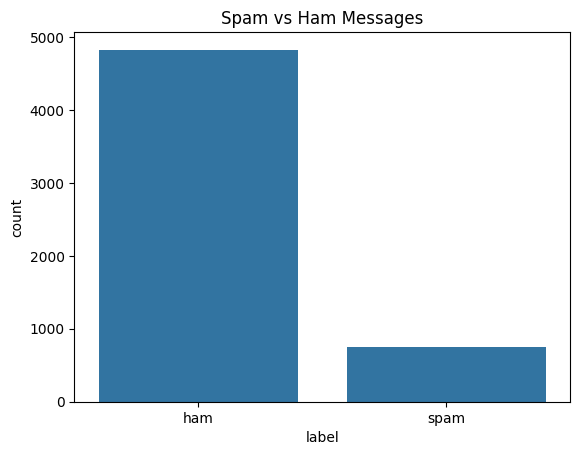

In [11]:
df['label'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Messages")
plt.show()


In [12]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [13]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()


,label,message
0,NaN,"Go until jurong point, crazy.. Available only ..."
1,NaN,Ok lar... Joking wif u oni...
2,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,NaN,U dun say so early hor... U c already then say...
4,NaN,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
X = df['message']
y = df['label']


In [17]:
df['label'].value_counts(dropna=False)

,count
label,
NaN,5572


In [18]:
df['label'] = df['label'].astype(str).str.strip().str.lower()

In [19]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [20]:
df = df.dropna(subset=['label'])

In [21]:
df['label'].value_counts()

,count
label,


In [23]:
# Check how many rows exist
df.shape

(0, 2)

In [24]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [26]:
df = df.iloc[:, :2]          # take first two columns only
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [28]:
df['label'] = (
    df['label']
    .astype(str)
    .str.lower()
    .str.strip()
)

In [29]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [30]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [31]:
df.shape
df['label'].value_counts()


,count
label,
0,4825
1,747


In [32]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.9,
    min_df=2
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [34]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [35]:
y_pred = model.predict(X_test_vec)

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 97.40%


In [37]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



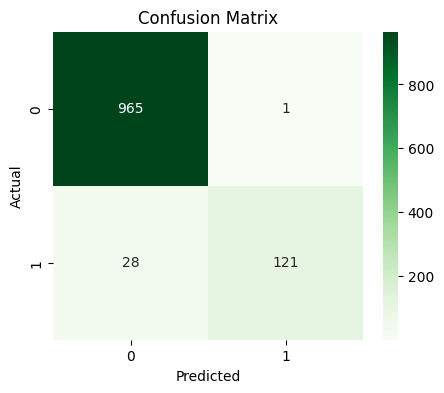

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [39]:
sample_email = [
    "Urgent! Your bank account has been compromised. Click here to verify immediately."
]

sample_vec = vectorizer.transform(sample_email)
prediction = model.predict(sample_vec)

if prediction[0] == 1:
    print("⚠️ Spam / Phishing Email Detected")
else:
    print("✅ Legitimate Email")


⚠️ Spam / Phishing Email Detected


In [40]:
import joblib

joblib.dump(model, "spam_phishing_model.pkl")
print("Model saved successfully")


Model saved successfully


In [41]:
test_message = [
    """Test Your Security+ Knowledge: Day 27
    Question: A company wants to ensure that employees can access internal resources
    while working remotely, but also wants to enforce strong authentication and limit
    access based on device health and user role. Which of the following solutions BEST
    meets this requirement?"""
]


In [42]:
test_message_vec = vectorizer.transform(test_message)


In [43]:
prediction = model.predict(test_message_vec)


In [44]:
if prediction[0] == 1:
    print("⚠️ Spam / Phishing Content Detected")
else:
    print("✅ Legitimate / Informational Content")


✅ Legitimate / Informational Content
